# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp /gdrive/MyDrive/tmp/glaucoma.zip ./

In [ ]:
!unzip glaucoma.zip

Archive:  glaucoma.zip
   creating: test/
   creating: test/advanced/
  inflating: test/advanced/421.png   
  inflating: test/advanced/422.png   
  inflating: test/advanced/423.png   
  inflating: test/advanced/424.png   
  inflating: test/advanced/425.png   
  inflating: test/advanced/426.png   
  inflating: test/advanced/427.png   
  inflating: test/advanced/428.png   
  inflating: test/advanced/429.png   
  inflating: test/advanced/430.png   
  inflating: test/advanced/431.png   
  inflating: test/advanced/432.png   
  inflating: test/advanced/433.png   
  inflating: test/advanced/434.png   
  inflating: test/advanced/435.png   
  inflating: test/advanced/436.png   
  inflating: test/advanced/437.png   
  inflating: test/advanced/438.png   
  inflating: test/advanced/439.png   
  inflating: test/advanced/440.png   
  inflating: test/advanced/441.png   
  inflating: test/advanced/442.png   
  inflating: test/advanced/443.png   
  inflating: test/advanced/444.png   
  inflating: test/

In [ ]:
!mkdir glaucoma
!mv train glaucoma/
!mv valid glaucoma/
!mv test glaucoma/

# 전이 학습 시도

31801344/31790344 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 17,663,491
Non

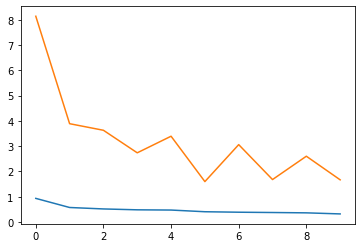

3/3 [==============================] - 1s 285ms/step - loss: 2.0642 - acc: 0.4870
loss= 2.0642495155334473
acc= 0.48701298236846924


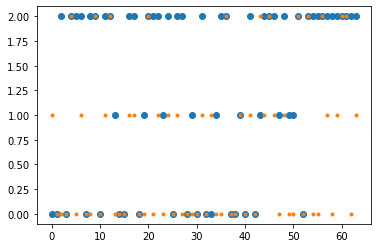

label category index = 0.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 전이학습 인데 conv도 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 68992)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 25,364,485
Non-trainable params: 68,087
_____________________________________

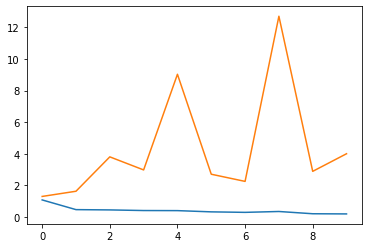

3/3 [==============================] - 1s 153ms/step - loss: 4.3178 - acc: 0.4026
loss= 4.317797660827637
acc= 0.4025973975658417


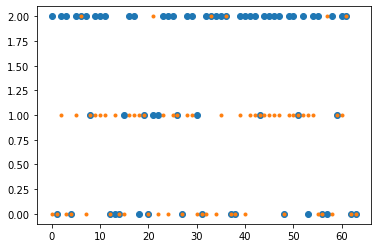

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = True   # <-----------------------

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# vanila CNN으로

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

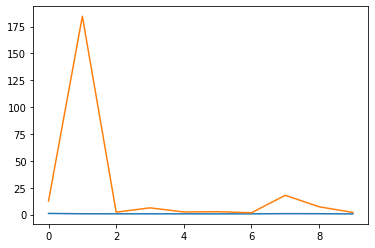

3/3 [==============================] - 1s 519ms/step - loss: 2.2864 - acc: 0.3182
loss= 2.2863669395446777
acc= 0.3181818127632141


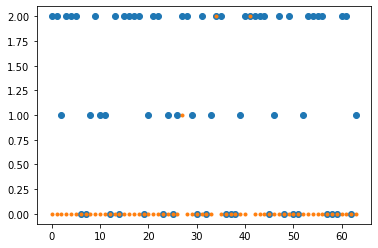

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))   # <-----------------------
# conv_layers.trainable = True   # <-----------------------

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# learning rate 작게

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

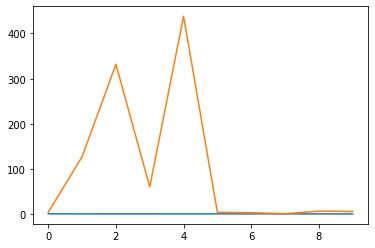

3/3 [==============================] - 1s 156ms/step - loss: 7.1291 - acc: 0.3052
loss= 7.129073619842529
acc= 0.30519479513168335


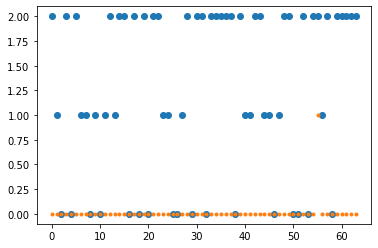

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)   # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])   # <-----------------------
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [ ]:
train_data_generator.batch_size=1000
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

(1000, 224, 224, 3)
(1000,)


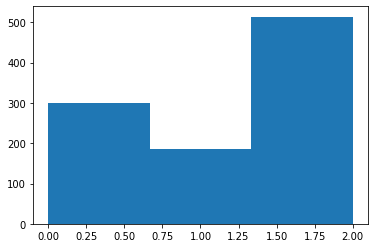

In [ ]:
plt.hist(batch_y, bins=3)
plt.show()

# optimizer를 Adam으로

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

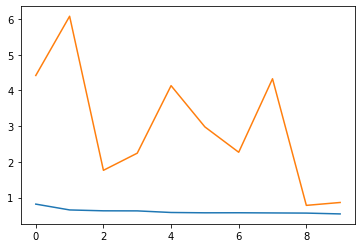

3/3 [==============================] - 1s 155ms/step - loss: 1.1083 - acc: 0.4545
loss= 1.1082583665847778
acc= 0.4545454680919647


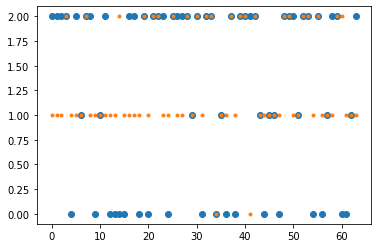

label category index = 2.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)   # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# epoch 더 많이 학습

Epoch 1/40
20/20 [==============================] - 18s 868ms/step - loss: 0.5333 - acc: 0.7789 - val_loss: 1.4529 - val_acc: 0.5188
Epoch 2/40
20/20 [==============================] - 17s 860ms/step - loss: 0.5269 - acc: 0.7748 - val_loss: 2.2313 - val_acc: 0.3938
Epoch 3/40
20/20 [==============================] - 17s 868ms/step - loss: 0.5053 - acc: 0.7951 - val_loss: 1.4714 - val_acc: 0.7188
Epoch 4/40
20/20 [==============================] - 18s 867ms/step - loss: 0.5292 - acc: 0.7813 - val_loss: 2.1754 - val_acc: 0.5688
Epoch 5/40
20/20 [==============================] - 17s 860ms/step - loss: 0.5164 - acc: 0.7821 - val_loss: 1.4373 - val_acc: 0.5750
Epoch 6/40
20/20 [==============================] - 18s 926ms/step - loss: 0.5042 - acc: 0.7854 - val_loss: 0.6855 - val_acc: 0.7125
Epoch 7/40
20/20 [==============================] - 17s 866ms/step - loss: 0.5054 - acc: 0.7894 - val_loss: 1.2552 - val_acc: 0.6000
Epoch 8/40
20/20 [==============================] - 17s 863ms/step - 

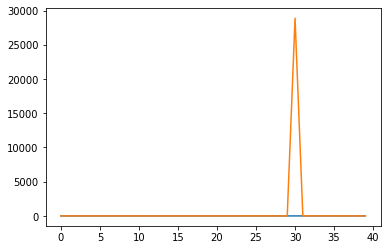

3/3 [==============================] - 1s 158ms/step - loss: 1.1822 - acc: 0.4221
loss= 1.1821633577346802
acc= 0.4220779240131378


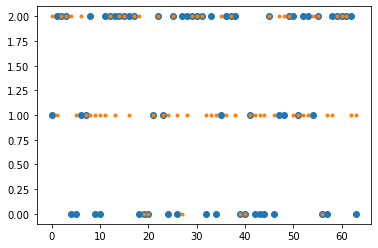

label category index = 1.0
predicted category index = 2
predicted category name = normal


In [ ]:
history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40   # <-----------------------
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

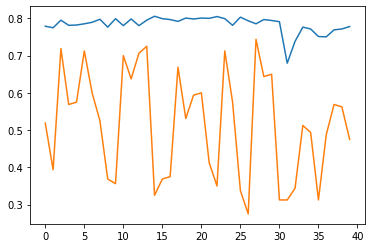

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

# Conv 레이어들 작게 조정

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_70 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_71 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_73 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

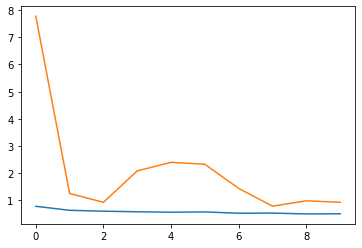

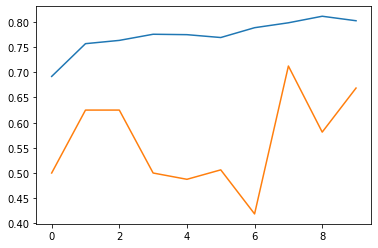

3/3 [==============================] - 1s 441ms/step - loss: 1.1576 - acc: 0.5649
loss= 1.157572627067566
acc= 0.5649350881576538


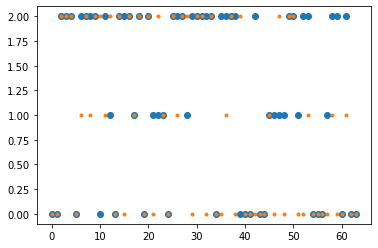

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# Conv 더 작게

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_85 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_86 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_88 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

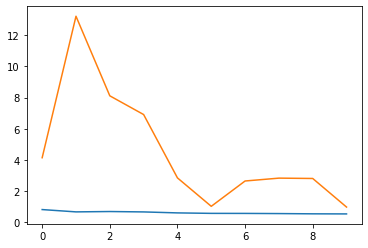

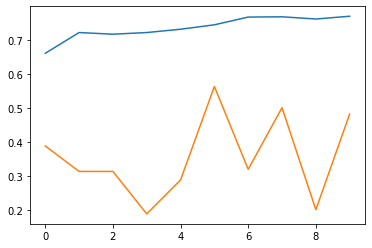

3/3 [==============================] - 1s 160ms/step - loss: 1.1353 - acc: 0.4221
loss= 1.1353431940078735
acc= 0.4220779240131378


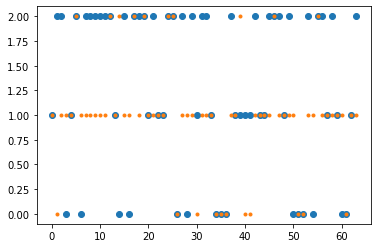

label category index = 1.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 사용하면 안될 preprocess를 제거하고 scaling

(32, 224, 224, 3)
(32,)


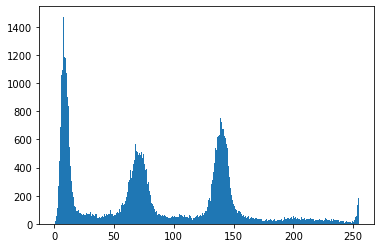

In [ ]:
train_data_generator.batch_size=32
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

plt.hist(batch_x[0].flatten(), bins=1000)
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_100 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_101 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_103 (Conv2D)         (None, 112, 112, 32)      9248      
                                                      

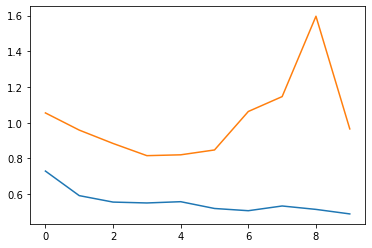

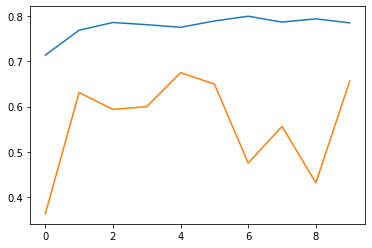

3/3 [==============================] - 1s 154ms/step - loss: 1.1733 - acc: 0.5519
loss= 1.1733235120773315
acc= 0.551948070526123


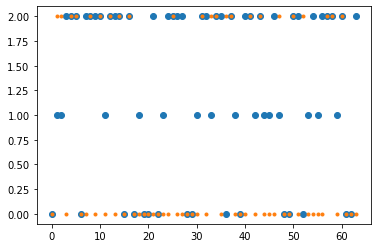

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <-----------------------
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <-----------------------
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <-----------------------
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


(32, 224, 224, 3)
(32,)


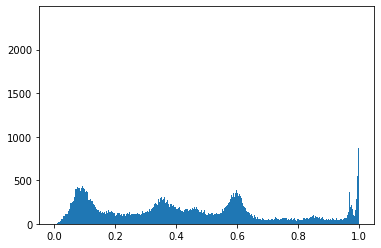

In [ ]:
train_data_generator.batch_size=32
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

plt.hist(batch_x[0].flatten(), bins=1000)
plt.show()

# Learning Rate 더 줄이고, epoch 수 많이

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_115 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_116 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_118 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

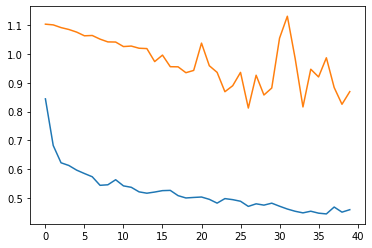

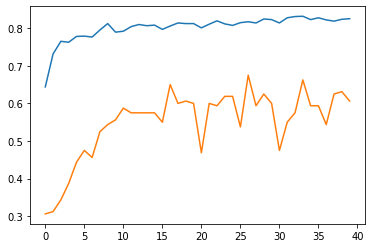

3/3 [==============================] - 1s 149ms/step - loss: 1.0334 - acc: 0.5649
loss= 1.0333715677261353
acc= 0.5649350881576538


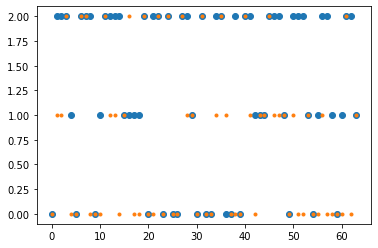

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40  # <-----------------------
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 데이터 증강 제거

GPU를 거의 사용하지 못한다

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_130 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_131 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_132 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_133 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

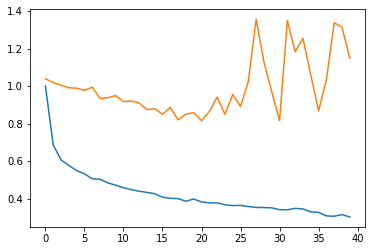

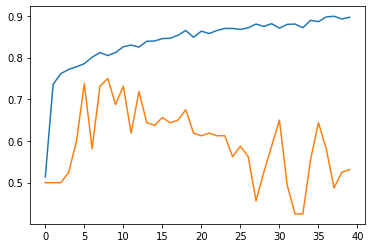

3/3 [==============================] - 1s 153ms/step - loss: 1.4470 - acc: 0.4610
loss= 1.4469951391220093
acc= 0.4610389471054077


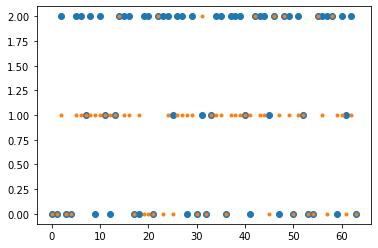

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      # rotation_range=10,  # <-----------------------
      # width_shift_range=0.1,  # <-----------------------
      # height_shift_range=0.1,  # <-----------------------
      # horizontal_flip=True,  # <-----------------------
      # vertical_flip=False,  # <-----------------------
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 1000 에폭, 다시 데이터 증강하고

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_144 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_145 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_146 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_147 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_148 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

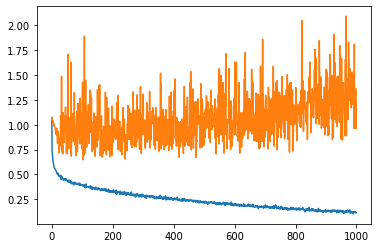

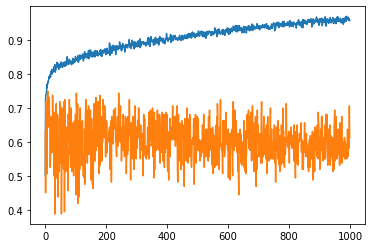

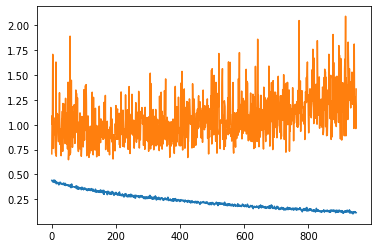

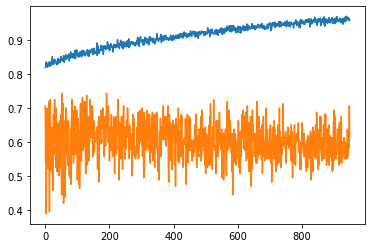

3/3 [==============================] - 1s 152ms/step - loss: 1.6429 - acc: 0.5519
loss= 1.6429442167282104
acc= 0.551948070526123


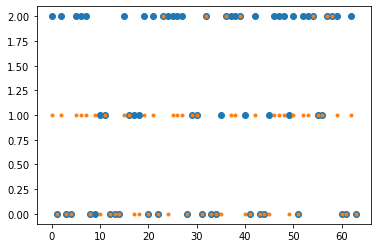

label category index = 2.0
predicted category index = 1
predicted category name = early


In [31]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,  # <-----------------------
      width_shift_range=0.1,  # <-----------------------
      height_shift_range=0.1,  # <-----------------------
      horizontal_flip=True,  # <-----------------------
      vertical_flip=False,  # <-----------------------
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=1000
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()

plt.plot(history.history['acc'][50:])
plt.plot(history.history['val_acc'][50:])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])
